# 1. Different Types of Data

In [89]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

1.1 Import the data

In [90]:
data = pd.read_csv('WDIData.csv')

In [91]:
data.shape

(377256, 65)

In [92]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [93]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


1.2 Check the number of rows and columns. 
Check how many unique indicator names and country codes are available in the data.

In [94]:
data['Indicator Name'].nunique()

1429

In [95]:
data['Country Code'].nunique()

264

In [96]:
264*1429

377256

1.3 Create a new dataframe where indicator name is 'Central government debt, total (% of GDP)'

Create a new dataframe where indicator name is 'Military expenditure (% of GDP)'

In [ ]:
subs1 = 'government debt'
data[data['Indicator Name'].str.contains(subs1)]

In [99]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']

In [101]:
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [102]:
central_govt_debt.shape

(264, 65)

In [103]:
military_exp.shape

(264, 65)

In [105]:
central_govt_debt['2010'].describe()

count     60.000000
mean      50.998766
std       31.761185
min        0.029257
25%       26.717163
50%       48.442052
75%       66.592551
max      162.296407
Name: 2010, dtype: float64

1.4 Assign the country code as the index for the two dataframes you created earlier.

Keep the countries where both columns have non-missing values.

Create a histogram for the military expenditure column.



In [107]:
central_govt_debt.index = central_govt_debt['Country Code']

In [108]:
central_govt_debt.index

Index(['ARB', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'TEA', 'EMU', 'ECS', 'ECA',
       ...
       'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'VIR', 'PSE', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='Country Code', length=264)

In [109]:
military_exp.index = military_exp['Country Code']

In [110]:
central_govt_debt.shape

(264, 65)

In [116]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]

In [118]:
central_govt_debt_2010.shape

(60,)

In [117]:
sum(central_govt_debt_2010.isnull())

0

In [195]:
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]

In [196]:
military_exp_2010.shape

(193,)

In [197]:
military_exp_2010.shape

(193,)

In [198]:
data_to_plot = pd.concat((central_govt_debt_2010,military_exp_2010), axis=1)

In [199]:
data_to_plot.head()

,2010,2010
Country Code,,
ECA,21.479749,2.819325
TEC,21.479749,2.668534
LMC,44.600505,1.950080
NAC,85.464274,4.320812
SAS,52.040420,2.676482


In [200]:
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [201]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
ECA,21.479749,2.819325
TEC,21.479749,2.668534
LMC,44.600505,1.950080
NAC,85.464274,4.320812
SAS,52.040420,2.676482


In [202]:
data_to_plot

,central_govt_debt,military_exp
Country Code,,
ECA,21.479749,2.819325
TEC,21.479749,2.668534
LMC,44.600505,1.950080
NAC,85.464274,4.320812
SAS,52.040420,2.676482
...,...,...
VEN,NaN,1.013489
VNM,NaN,2.305049
YEM,NaN,4.685557


In [203]:
data_to_plot.isnull().any(axis=1)

Country Code
ECA    False
TEC    False
LMC    False
NAC    False
SAS    False
       ...  
VEN     True
VNM     True
YEM     True
ZMB     True
ZWE     True
Length: 205, dtype: bool

In [204]:
d=data_to_plot.loc[~data_to_plot.isnull().any(axis=1)]

In [130]:
data_to_plot.shape, d.shape

((205, 2), (48, 2))

In [131]:
d[:10]

,central_govt_debt,military_exp
Country Code,,
ECA,21.479749,2.819325
TEC,21.479749,2.668534
LMC,44.600505,1.950080
NAC,85.464274,4.320812
SAS,52.040420,2.676482
TSA,52.040420,2.676482
AUS,0.029257,1.862400
AZE,6.385576,2.791004
BLR,18.440358,1.341383


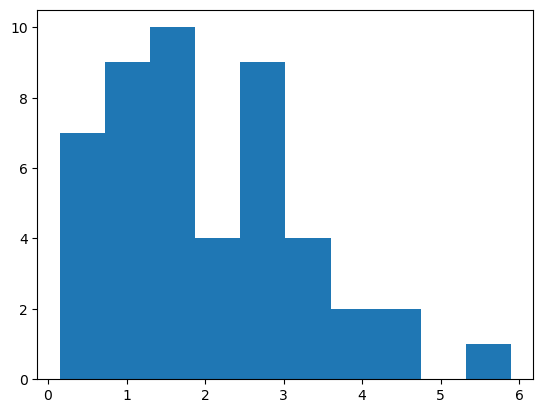

In [133]:
plt.hist(d['military_exp']);

### 1.1.2 Time Series Data

1.5 
a. filter the two datasets above for country ode 'USA'

b. concatenate  the two series (data for the US) after taking a transpose of them.

c. keep the data corresponding to years between 1960 and 2010 (including).

d. drop the rows with missing values

e. Create plots for the military and government expenditure as a function of time

In [205]:
central_govt_debt_us = central_govt_debt.loc[\
                                           central_govt_debt['Country Code']=='USA' ].T

In [142]:
central_govt_debt_us

Country Code,USA
Country Name,United States
Country Code,USA
Indicator Name,"Central government debt, total (% of GDP)"
Indicator Code,GC.DOD.TOTL.GD.ZS
1960,NaN
...,...
2016,99.017115
2017,NaN
2018,NaN
2019,NaN


In [206]:
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA'].T

In [140]:
military_exp_us

Country Code,USA
Country Name,United States
Country Code,USA
Indicator Name,Military expenditure (% of GDP)
Indicator Code,MS.MIL.XPND.GD.ZS
1960,8.619593
...,...
2016,3.207892
2017,3.10901
2018,3.162865
2019,NaN


In [207]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)

In [144]:
data_us

Country Code,USA,USA
Country Name,United States,United States
Country Code,USA,USA
Indicator Name,Military expenditure (% of GDP),"Central government debt, total (% of GDP)"
Indicator Code,MS.MIL.XPND.GD.ZS,GC.DOD.TOTL.GD.ZS
1960,8.619593,NaN
...,...,...
2016,3.207892,99.017115
2017,3.10901,NaN
2018,3.162865,NaN
2019,NaN,NaN


In [145]:
data_us.index

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [208]:
index0=np.where(data_us.index=='1960')[0][0]

In [147]:
index0

(array([4]),)

In [149]:
index0[0][0]

4

In [209]:
index1=np.where(data_us.index=='2010')[0][0]

In [210]:
data_us=data_us.iloc[index0:index1+1,:]

In [211]:
data_us.columns=['Federal Military Exp', 'Federal Debt']

In [212]:
data_us.loc['1960':'2010' ]

,Federal Military Exp,Federal Debt
1960,8.619593,NaN
1961,8.775733,NaN
1962,8.944079,NaN
1963,8.465056,NaN
1964,7.716869,NaN
1965,7.206953,NaN
1966,8.070841,NaN
1967,9.063367,NaN
1968,8.873111,NaN
1969,8.272944,NaN


In [213]:
d=data_us.dropna()

In [159]:
d.shape

(22, 2)

<Axes: title={'center': 'Federal Debt'}>

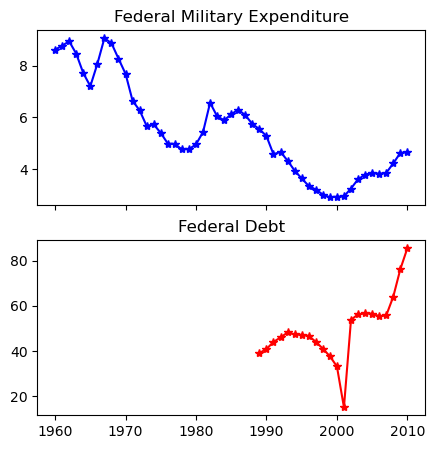

In [214]:
f, axs=plt.subplots(2, sharex=True, figsize=(5,5))
axs[0].set_title('Federal Military Expenditure')
data_us['Federal Military Exp'].plot(linestyle = '-', marker='*', color='b',ax=axs[0])

axs[1].set_title('Federal Debt')
data_us['Federal Debt'].plot(linestyle = '-', marker='*', color='r',ax=axs[1])

### 1.1.3 Panel Data

- Cross sectional
 - Multiple individuals at one point in time
- Time Series
 - Individual entity over multiple points in time
- Panel Data (longitudinal data)
 - Multiple entities over multiple points in time

1.6 create the military expenditure for the following countries between 
1960 and 2010.

The country codes: 

China: 'CHN'

USA:'USA'

India:'IND'

UK:'GBR'

In [169]:
I ='Indicator Name'
M = 'Military expenditure (% of GDP)'
C = 'Country Code'

In [168]:
data.shape

(377256, 65)

In [173]:
((data[I]==M) & (data[C]=='USA')).values

array([False, False, False, ..., False, False, False])

In [175]:
data.iloc[((data[I]==M) & (data[C]=='USA')).values,index0:index1+1]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
362314,8.619593,8.775733,8.944079,8.465056,7.716869,7.206953,8.070841,9.063367,8.873111,8.272944,...,2.944343,3.249549,3.607286,3.785571,3.861065,3.81958,3.853906,4.221692,4.627103,4.657001


In [193]:
chn = data.iloc[((data[I]==M) & (data[C]=='CHN')).values,index0:index1+1]
chn = pd.Series(chn.values[0],index=chn.columns)
chn.fillna(0, inplace=True)

usa = data.iloc[((data[I]==M) & (data[C]=='USA')).values,index0:index1+1]
usa = pd.Series(usa.values[0],index=usa.columns)
usa.fillna(0, inplace=True)

ind = data.iloc[((data[I]==M) & (data[C]=='IND')).values,index0:index1+1]
ind = pd.Series(ind.values[0],index=ind.columns)
ind.fillna(0, inplace=True)


gbr = data.iloc[((data[I]==M) & (data[C]=='GBR')).values,index0:index1+1]
gbr = pd.Series(gbr.values[0],index=gbr.columns)
gbr.fillna(0, inplace=True)


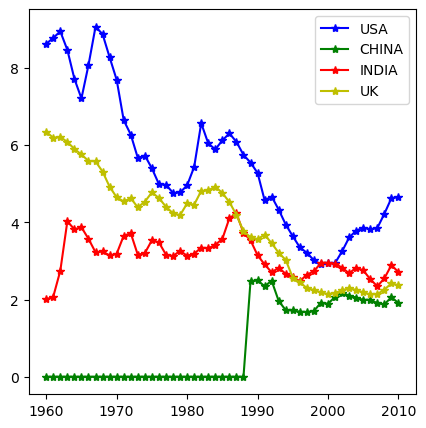

In [194]:
plt.figure(figsize=(5,5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA', 'CHINA', 'INDIA', "UK"])

# 2. Internal Structure of Time Series

### Objectives of Time Series Analysis
- Decompose a time series
- Develop mathematical models
- Uses of models
 - Understand observed behaviour
 - Predict series for future points in time

2.1 Read the data 'Monthly_CO2_Concentratioins.xlsx'

Keep the rows wihout any missing values

Plot the Co2 concentration, observe the upward trend

Plot the data for only years 1980 and 1981





In [ ]:
#pip install openpyxl

In [219]:
data2 = pd.read_excel('Monthly_CO2_concentrations.xlsx',\
                     converters={'Year': np.int32, 'Month': np.int32})

In [220]:
data2.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [221]:
data2.shape

(174, 3)

In [222]:
data2 = data2.loc[~data2.isnull().any(axis=1)]

In [223]:
data2.shape

(161, 3)

In [224]:
data2.sort_values(['Year', 'Month'], inplace=True)

## 2.1 Upward Trend

In [225]:
data2.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


<Axes: >

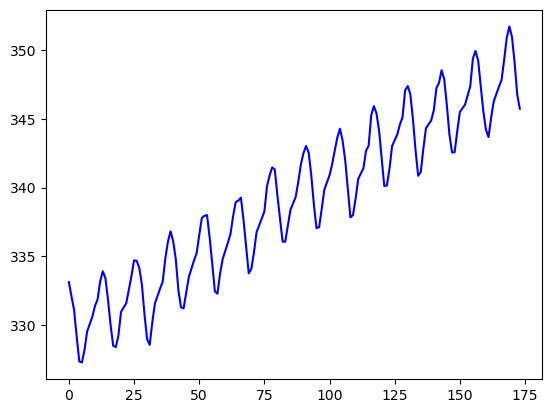

In [226]:
data2['CO2'].plot(color='b')

In [ ]:
data2['CO2'].loc[(data2['Year']==1980)|(data2['Year']==1981)]

<Axes: >

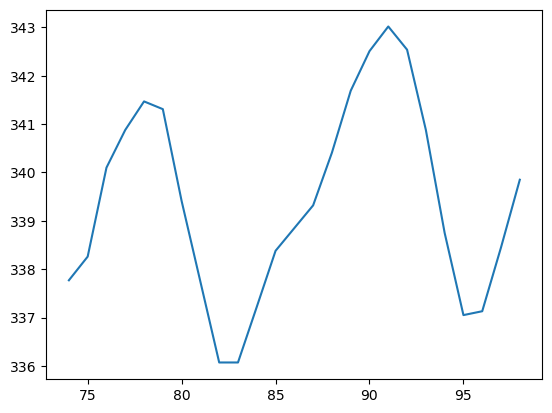

In [231]:
data2['CO2'].loc[(data2['Year']==1980)|(data2['Year']==1981)].plot()

### Zoomed-in Version of the Data Between 1980-81

### Fitting The Trend Line

Fit a linear regression model using the data and 
print the coefficient and the intercept



In [236]:
np.array(data2.index).reshape(-1,1).shape

(161, 1)

In [237]:
from sklearn.linear_model import LinearRegression
trend_model=LinearRegression()

trend_model.fit(np.array(data2.index).reshape(-1,1),data2['CO2'])

LinearRegression()

In [239]:
trend_model.coef_, trend_model.intercept_

(array([0.11182208]), 329.4554222337025)

In [ ]:
CO2=329 + 0.11*Time

### Calculating the Residuals

Calculate the residuals by subtracting the predictions from the data

Plot the residuals


In [248]:
#data['CO2']
residuals = np.array(data2['CO2']-\
                     trend_model.predict(np.array(data2.index).reshape(-1,1)))

<Axes: >

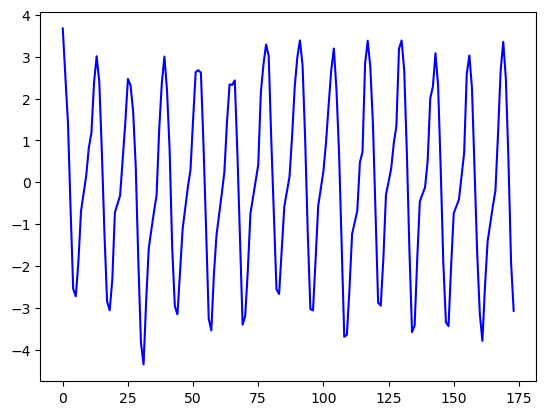

In [249]:
pd.Series(data = residuals, index=data2.index).plot(color='b')

### Seasonality

Seasonality is manifested as periodic deviations such as those seen in the de-trended observations of CO2 emissions.

A practical technique of determining seasonality is through exploratory data analysis through the following plots:

- Run sequence plot
- Seasonal sub series plot
- Multiple box plots


### Cylical Changes
Cyclical changes are movements observed after every few units of time, but they occur less frequently than seasonal fluctuations. Unlike seasonality, cyclical changes might not have a fixed period of variations. 

### Zero-mean Model or White Noise
Once predictions have been made by a time series forecast model, they can be collected and analyzed. The series of forecast errors should ideally be white noise. When forecast errors are white noise, it means that all of the signal information in the time series has been harnessed by the model in order to make predictions.

### Random Walk
A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence.

$$y(t)=B_0+B_1\times y(t-1) + e(t)$$

$e(t)$ is a random noise or increment at time t. It represents the random fluctuation or innovation added to the last observed value to obtain the next value in the time series.

Given the way that the random walk is constructed, we would expect a strong autocorrelation with the previous observation and a linear fall off from there with previous lag values.